# Bike Ride Trends of Ford GoBike For 2019


## Investigation Overview

In this investigation, I will look at the bike ride trends and biker type of the bay Area bike share system. The main focus was on biking duration, the time (weekday, hour), and the user types.

## Dataset Overview

This document explores the Ford GoBike's trip data for public containing bike rides from year 2019. All data from each month was combined and mastar csv was extracted. The attributes included the trip start/end time, as well as additional measurements such as user type. 16K data points were removed from the analysis due to missing values in some fields, data inconsistent, or outliner issues.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import vincenty
from geopy.distance import geodesic
import glob
import os

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('master_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,start_day_of_week,starting_hour,start_time_month,start_time_month_num,start_time_hour,end_time_hour,duration_min,distance_km
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,No,NaN,Thu,17,January,1,17,16,1347,5
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,No,NaN,Thu,20,January,1,20,15,1098,3
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,No,NaN,Thu,18,January,1,18,11,1043,3
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,No,NaN,Thu,19,January,1,19,8,744,1
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,No,NaN,Thu,14,January,1,14,7,1011,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 23 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
start_day_of_week          object
starting_hour              int64
start_time_month           object
start_time_month_num       int64
start_time_hour            int64
end_time_hour              int64
duration_min               int64
distance_km                int64
dtypes: float64(6), int64(8), object(9)
memory usage: 439.9+ MB



## Usage by Month

    The summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. July is the most popular month, with March as the second most popular, and October coming in closely as the third most popular months to use the bike system.

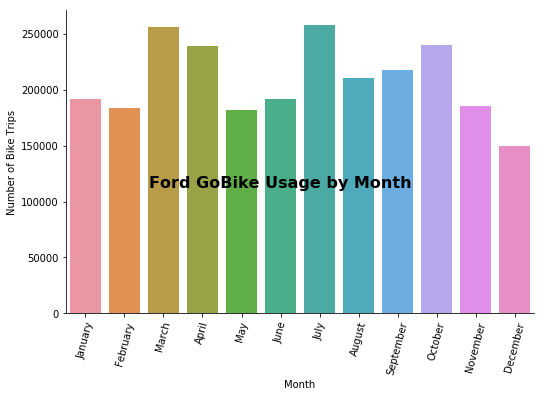

In [4]:
# Monthly usage of Ford Go Bike

graph = sb.catplot(data = df, x = 'start_time_month', kind = 'count', aspect = 1.5);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 0.5, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);


## Usage by WeekDay

    We can see that the normal working days are the days when majority of the bikers are using this service, while usage drops significantly on saturday and sunday. This indicates that most if the usage is comming from people who are regilar commuters while weekend usage is from people who may be tourists or people riding for fun.

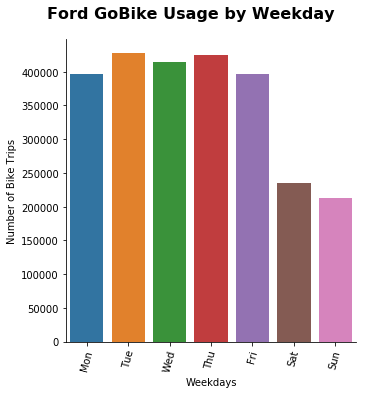

In [5]:
# Weekday usage of the Ford Go bike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df, x='start_day_of_week', kind='count', order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);


## Usage by Hours

    As found earlier that most users are regular commuters we can see that the peak usage comes at office hours in the morning and evening when users start to homes

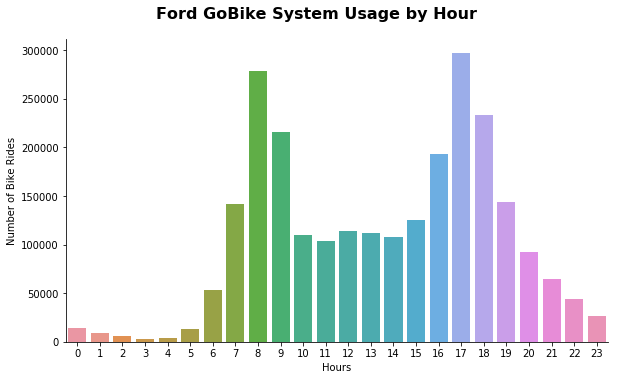

In [6]:
# Hourly usage of the Ford Go Bike System

graph = sb.catplot(data = df, x='starting_hour', kind='count', aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Subscriber Vs Customer usage

Below we can see that majority of the users are of type subscriber who are the regular users of this system. A small portion is made up of users who are not regular

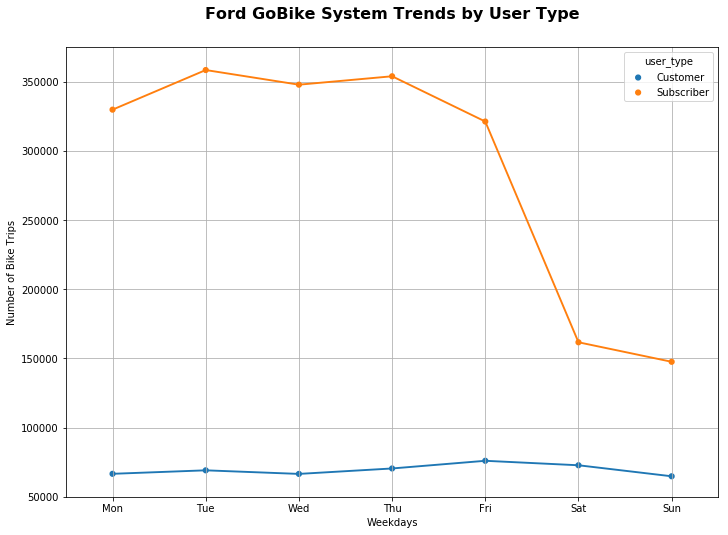

In [7]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday

plt.figure(figsize=[ 11.69, 8.27]);

df_temp = df.groupby(['start_day_of_week', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_temp, x='start_day_of_week', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Distance per user type per month

    Below shows the usage of typical customer and subscriber in each month showing that total distance covered by customer's are typically higher then subscriber showing that custoemr are perhaps some tourist and hence cover larger distance looking around places.

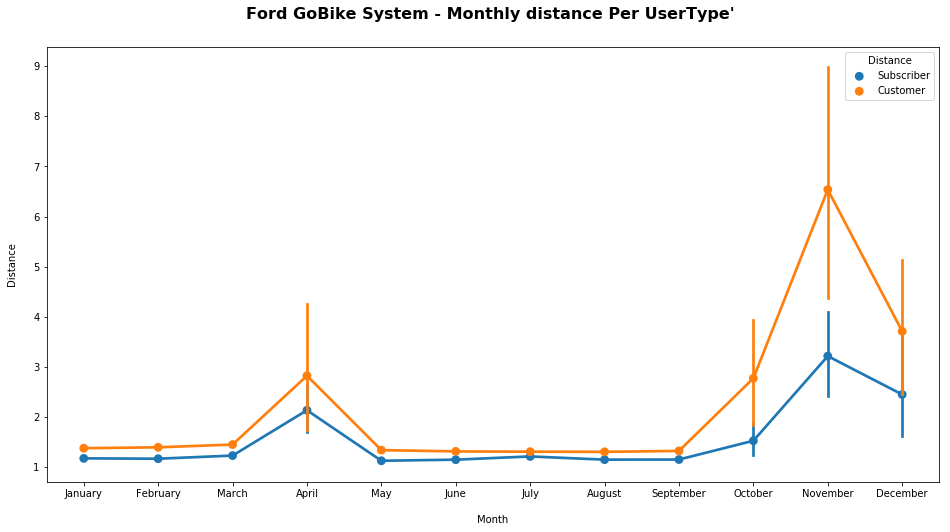

In [8]:
# Comparing monthly number of bike trips per subscribers, based on distance covered

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = plt.figure(figsize = [16,8])
ax = sb.pointplot(data = df, x='start_time_month', y='distance_km', hue='user_type',  order = months);

plt.xlabel('Month', labelpad = 16)
plt.ylabel('Distance', labelpad = 16)
plt.title("Ford GoBike System - Monthly distance Per UserType' ", y = 1.05, fontsize = 16, fontweight = 'bold');


# Legend
leg = ax.legend()
leg.set_title('Distance')

plt.show()


## Ford GoBike System - Summary

#### This project is a win - win situation where a large number of people can benefit from this program:

#### There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.